In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-15T15:25:28.688047+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
teeplot: 1.4.2
seaborn: 0.13.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_make_cv_sim_recipe": "make_cv_sim_uk",
    "cfg_make_wt_specs_recipe": "make_wt_specs_uk",
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_p_seq_mut": 2.74e-6,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_make_cv_sim_recipe': 'make_cv_sim_uk',
 'cfg_make_wt_specs_recipe': 'make_wt_specs_uk',
 'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_seq_mut': 2.74e-06,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified 

  0%|          | 0/4 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.0265579223632812e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 1.9388372898101807}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.18819212913513184}


 25%|██▌       | 1/4 [00:02<00:08,  2.92s/it]

enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.025438308715820312}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
enter log_context_duration for _do_sequences


 50%|█████     | 2/4 [00:03<00:02,  1.36s/it]

exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.1395859718322754}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.051377296447753906}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.006211519241333008}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.002716064453125e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.7118716239929199}
enter log_context_duration for extract


 75%|███████▌  | 3/4 [00:04<00:01,  1.35s/it]

exit log_context_duration for extract
!!! {"extract": 0.2604968547821045}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.029233217239379883}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.8596649169921875e-05}
enter log_context_duration for _do_sequences


100%|██████████| 4/4 [00:04<00:00,  1.19s/it]

exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.1320509910583496}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.04845237731933594}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.005817890167236328}
exit log_context_duration for generate_dummy_sequences_simple
!!! {"generate_dummy_sequences_simple": 7.833795070648193}
enter log_context_duration for extract variant


exit log_context_duration for extract variant
!!! {"extract variant": 0.1816108226776123}
enter log_context_duration for prepend sequence
exit log_context_duration for prepend sequence
!!! {"prepend sequence": 0.5048785209655762}
Rows: 5
Columns: 3
$ id       <i64> 0, 1, 9, 11, 12
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for phylo_df.merge
exit log_context_duration for phylo_df.merge
!!! {"phylo_df.merge": 0.08372831344604492}
enter log_context_duration for _add_sequence_diffs


 17%|█▋        | 2/12 [00:00<00:00, 11.24it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0036427974700927734}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.337860107421875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.04897260665893555}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.029170751571655273}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.004638195037841797}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.337860107421875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.051549434661865234}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.03170466423034668}
enter log_context_duration for seq_ar

 33%|███▎      | 4/12 [00:00<00:00, 11.26it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.05212116241455078}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.029076337814331055}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0036454200744628906}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.050348758697509766}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.029692411422729492}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.003973484039306641}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.0994415283203125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mism

 50%|█████     | 6/12 [00:00<00:00, 10.01it/s]

exit log_context_duration for res.collect
!!! {"res.collect": 0.03349614143371582}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.004033088684082031}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.337860107421875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.07087039947509766}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.054491281509399414}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.004167795181274414}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.337860107421875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.05413007736206055}
enter log_context_duration for res.collect


 83%|████████▎ | 10/12 [00:00<00:00, 12.26it/s]

exit log_context_duration for res.collect
!!! {"res.collect": 0.0372004508972168}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.003954887390136719}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.0994415283203125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.04059934616088867}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.01829218864440918}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.004013776779174805}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.814697265625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03397250175476074}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!

100%|██████████| 12/12 [00:01<00:00, 11.72it/s]


exit log_context_duration for mismatches
!!! {"mismatches": 0.05793023109436035}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0398859977722168}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0025873184204101562}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.029836416244506836}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.013357162475585938}
exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_diffs": 1.7885932922363281}
sequence_diff
{"0": "'",    1308
{"0": "'"}     260
Name: count, dtype: int64
Rows: 5
Columns: 16
$ source              <i64> 107456, 107456, 52203, 52203, 110900
$ target              <i64> 107456, 107456, 52203

In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 40
$ source                          <u32> 107456, 107456, 52203, 52203, 110900
$ target                          <u32> 107456, 107456, 52203, 52203, 110900
$ date                            <u16> 0, 0, 274, 274, 281
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Alpha+, Alpha+, Alpha+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 1, 2, 3
$ origin_time                     <u16> 0, 0, 274, 274, 281
$ ancestor_list                   <str> '[none]', '[0]', '[1]', '[2]', '[3]'
$ variant_flavor                  <cat> Wildtype, Wildtype, Alpha, Alpha, Alpha
$ is_root                        <bool> False, True, False, False, False
$ is_oldest_root                 <bool> True, True, False, False, False
$ is_leaf                        <bool> False, False, False, False, False
$ node_depth                     

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'",    1308
{"0": "'"}     260
Name: count, dtype: int64
Rows: 5
Columns: 41
$ source                          <u32> 107456, 107456, 52203, 52203, 110900
$ target                          <u32> 107456, 107456, 52203, 52203, 110900
$ date                            <u16> 0, 0, 274, 274, 281
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Alpha+, Alpha+, Alpha+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 1, 2, 3
$ origin_time                     <u16> 0, 0, 274, 274, 281
$ ancestor_list                   <str> '[none]', '[0]', '[1]', '[2]', '[3]'
$ variant_flavor                  <cat> Wildtype, Wildtype, Alpha, Alpha, Alpha
$ is_root                        <bool> False, True, False, False, False
$ is_oldest_root                 <bool> True, True, False, False, False
$ is_leaf                    

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: invalid value encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


exit log_context_duration for alifestd_mark_clade_subtended_duration_ratio_sister_asexual
!!! {"alifestd_mark_clade_subtended_duration_ratio_sister_asexual": 0.20501351356506348}
enter log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual



100%|██████████| 7464/7464 [00:26<00:00, 278.31it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 29.32392191886902}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 7464/7464 [00:07<00:00, 1033.61it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 12.517295360565186}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.0628211498260498}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 76.50850415229797}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.03921961784362793}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.009688615798950195}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.01568889617919922}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0012440681457519531}
ancestral_sequen


100%|██████████| 1171/1171 [00:00<00:00, 5037.02it/s]

process mutations:   0%|          | 1/1171 [00:00<04:45,  4.09it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   1%|          | 8/1171 [00:25<1:04:18,  3.32s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   26.6s



process mutations:   4%|▍         | 48/1171 [01:49<41:45,  2.23s/it] 

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.9min



process mutations:   8%|▊         | 88/1171 [03:10<38:20,  2.12s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  3.3min



process mutations:  11%|█         | 128/1171 [04:32<36:22,  2.09s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  4.7min



process mutations:  14%|█▍        | 168/1171 [05:56<34:57,  2.09s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  6.1min



process mutations:  18%|█▊        | 208/1171 [07:17<33:10,  2.07s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  7.4min



process mutations:  21%|██        | 248/1171 [08:37<31:25,  2.04s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  8.8min



process mutations:  25%|██▍       | 288/1171 [09:57<29:56,  2.03s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed: 10.2min



process mutations:  28%|██▊       | 328/1171 [11:19<28:40,  2.04s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed: 11.5min



process mutations:  31%|███▏      | 368/1171 [12:39<27:03,  2.02s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 358 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed: 12.9min



process mutations:  35%|███▍      | 408/1171 [13:58<25:33,  2.01s/it]

[Parallel(n_jobs=-1)]: Done 378 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed: 14.2min



process mutations:  38%|███▊      | 448/1171 [15:19<24:19,  2.02s/it]

[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 428 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed: 15.6min



process mutations:  42%|████▏     | 488/1171 [16:41<23:05,  2.03s/it]

[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 468 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 478 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 17.0min



process mutations:  45%|████▌     | 528/1171 [18:02<21:39,  2.02s/it]

[Parallel(n_jobs=-1)]: Done 498 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 518 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed: 18.3min



process mutations:  49%|████▊     | 568/1171 [19:21<20:12,  2.01s/it]

[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 548 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 558 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 568 tasks      | elapsed: 19.6min



process mutations:  52%|█████▏    | 608/1171 [20:41<18:48,  2.00s/it]

[Parallel(n_jobs=-1)]: Done 578 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 588 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 598 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 608 tasks      | elapsed: 21.0min



process mutations:  55%|█████▌    | 648/1171 [22:01<17:30,  2.01s/it]

[Parallel(n_jobs=-1)]: Done 618 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 628 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 638 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed: 22.3min



process mutations:  59%|█████▉    | 688/1171 [23:20<16:03,  1.99s/it]

[Parallel(n_jobs=-1)]: Done 658 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed: 23.7min



process mutations:  62%|██████▏   | 728/1171 [24:39<14:42,  1.99s/it]

[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 708 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed: 25.0min



process mutations:  66%|██████▌   | 768/1171 [26:00<13:27,  2.00s/it]

[Parallel(n_jobs=-1)]: Done 738 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 748 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 758 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed: 26.4min



process mutations:  69%|██████▉   | 808/1171 [27:22<12:11,  2.02s/it]

[Parallel(n_jobs=-1)]: Done 778 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 798 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed: 27.8min



process mutations:  72%|███████▏  | 848/1171 [28:43<10:51,  2.02s/it]

[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 838 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed: 29.2min



process mutations:  76%|███████▌  | 888/1171 [30:03<09:29,  2.01s/it]

[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 868 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed: 30.5min



process mutations:  79%|███████▉  | 928/1171 [31:23<08:07,  2.01s/it]

[Parallel(n_jobs=-1)]: Done 898 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 908 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 918 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed: 31.9min



process mutations:  83%|████████▎ | 968/1171 [32:44<06:49,  2.02s/it]

[Parallel(n_jobs=-1)]: Done 938 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 958 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 968 tasks      | elapsed: 33.2min



process mutations:  86%|████████▌ | 1008/1171 [34:03<05:26,  2.00s/it]

[Parallel(n_jobs=-1)]: Done 978 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 988 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 998 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed: 34.6min



process mutations:  89%|████████▉ | 1048/1171 [35:23<04:06,  2.00s/it]

[Parallel(n_jobs=-1)]: Done 1018 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 1028 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 1038 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 1048 tasks      | elapsed: 36.0min



process mutations:  93%|█████████▎| 1088/1171 [36:45<02:46,  2.01s/it]

[Parallel(n_jobs=-1)]: Done 1058 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 1068 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 1078 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 1088 tasks      | elapsed: 37.3min



process mutations:  96%|█████████▋| 1128/1171 [38:06<01:26,  2.02s/it]

[Parallel(n_jobs=-1)]: Done 1098 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 1108 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 1118 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 38.7min



process mutations: 100%|██████████| 1171/1171 [39:25<00:00,  2.02s/it]

[Parallel(n_jobs=-1)]: Done 1138 tasks      | elapsed: 39.4min


[Parallel(n_jobs=-1)]: Done 1139 tasks      | elapsed: 39.6min
[Parallel(n_jobs=-1)]: Done 1149 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 1150 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 1171 out of 1171 | elapsed: 39.9min finished


process replicate: 100%|██████████| 1/1 [41:22<00:00, 2482.73s/it]


enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.3262512683868408}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 119
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.013049605302512646, 0.013049605302512646, 0.013049605302512646, 0.013049605302512646, 0.013049605302512646
$ mut_nobs                       <u16> 1741, 1741, 1741, 1741, 1741
$ mut_uuid                       <str> '16ff8693-b680-8a47-999a-307296378876', '16ff8693-b680-8a47-999a-307296378876', '16ff8693-b680-8a47-999a-307296
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 14906, 14915, 14906, 14915, 14705
$ phyo_df_screened_len            <u8> 22, 13, 22, 13, 223
$ tb_stat                     

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


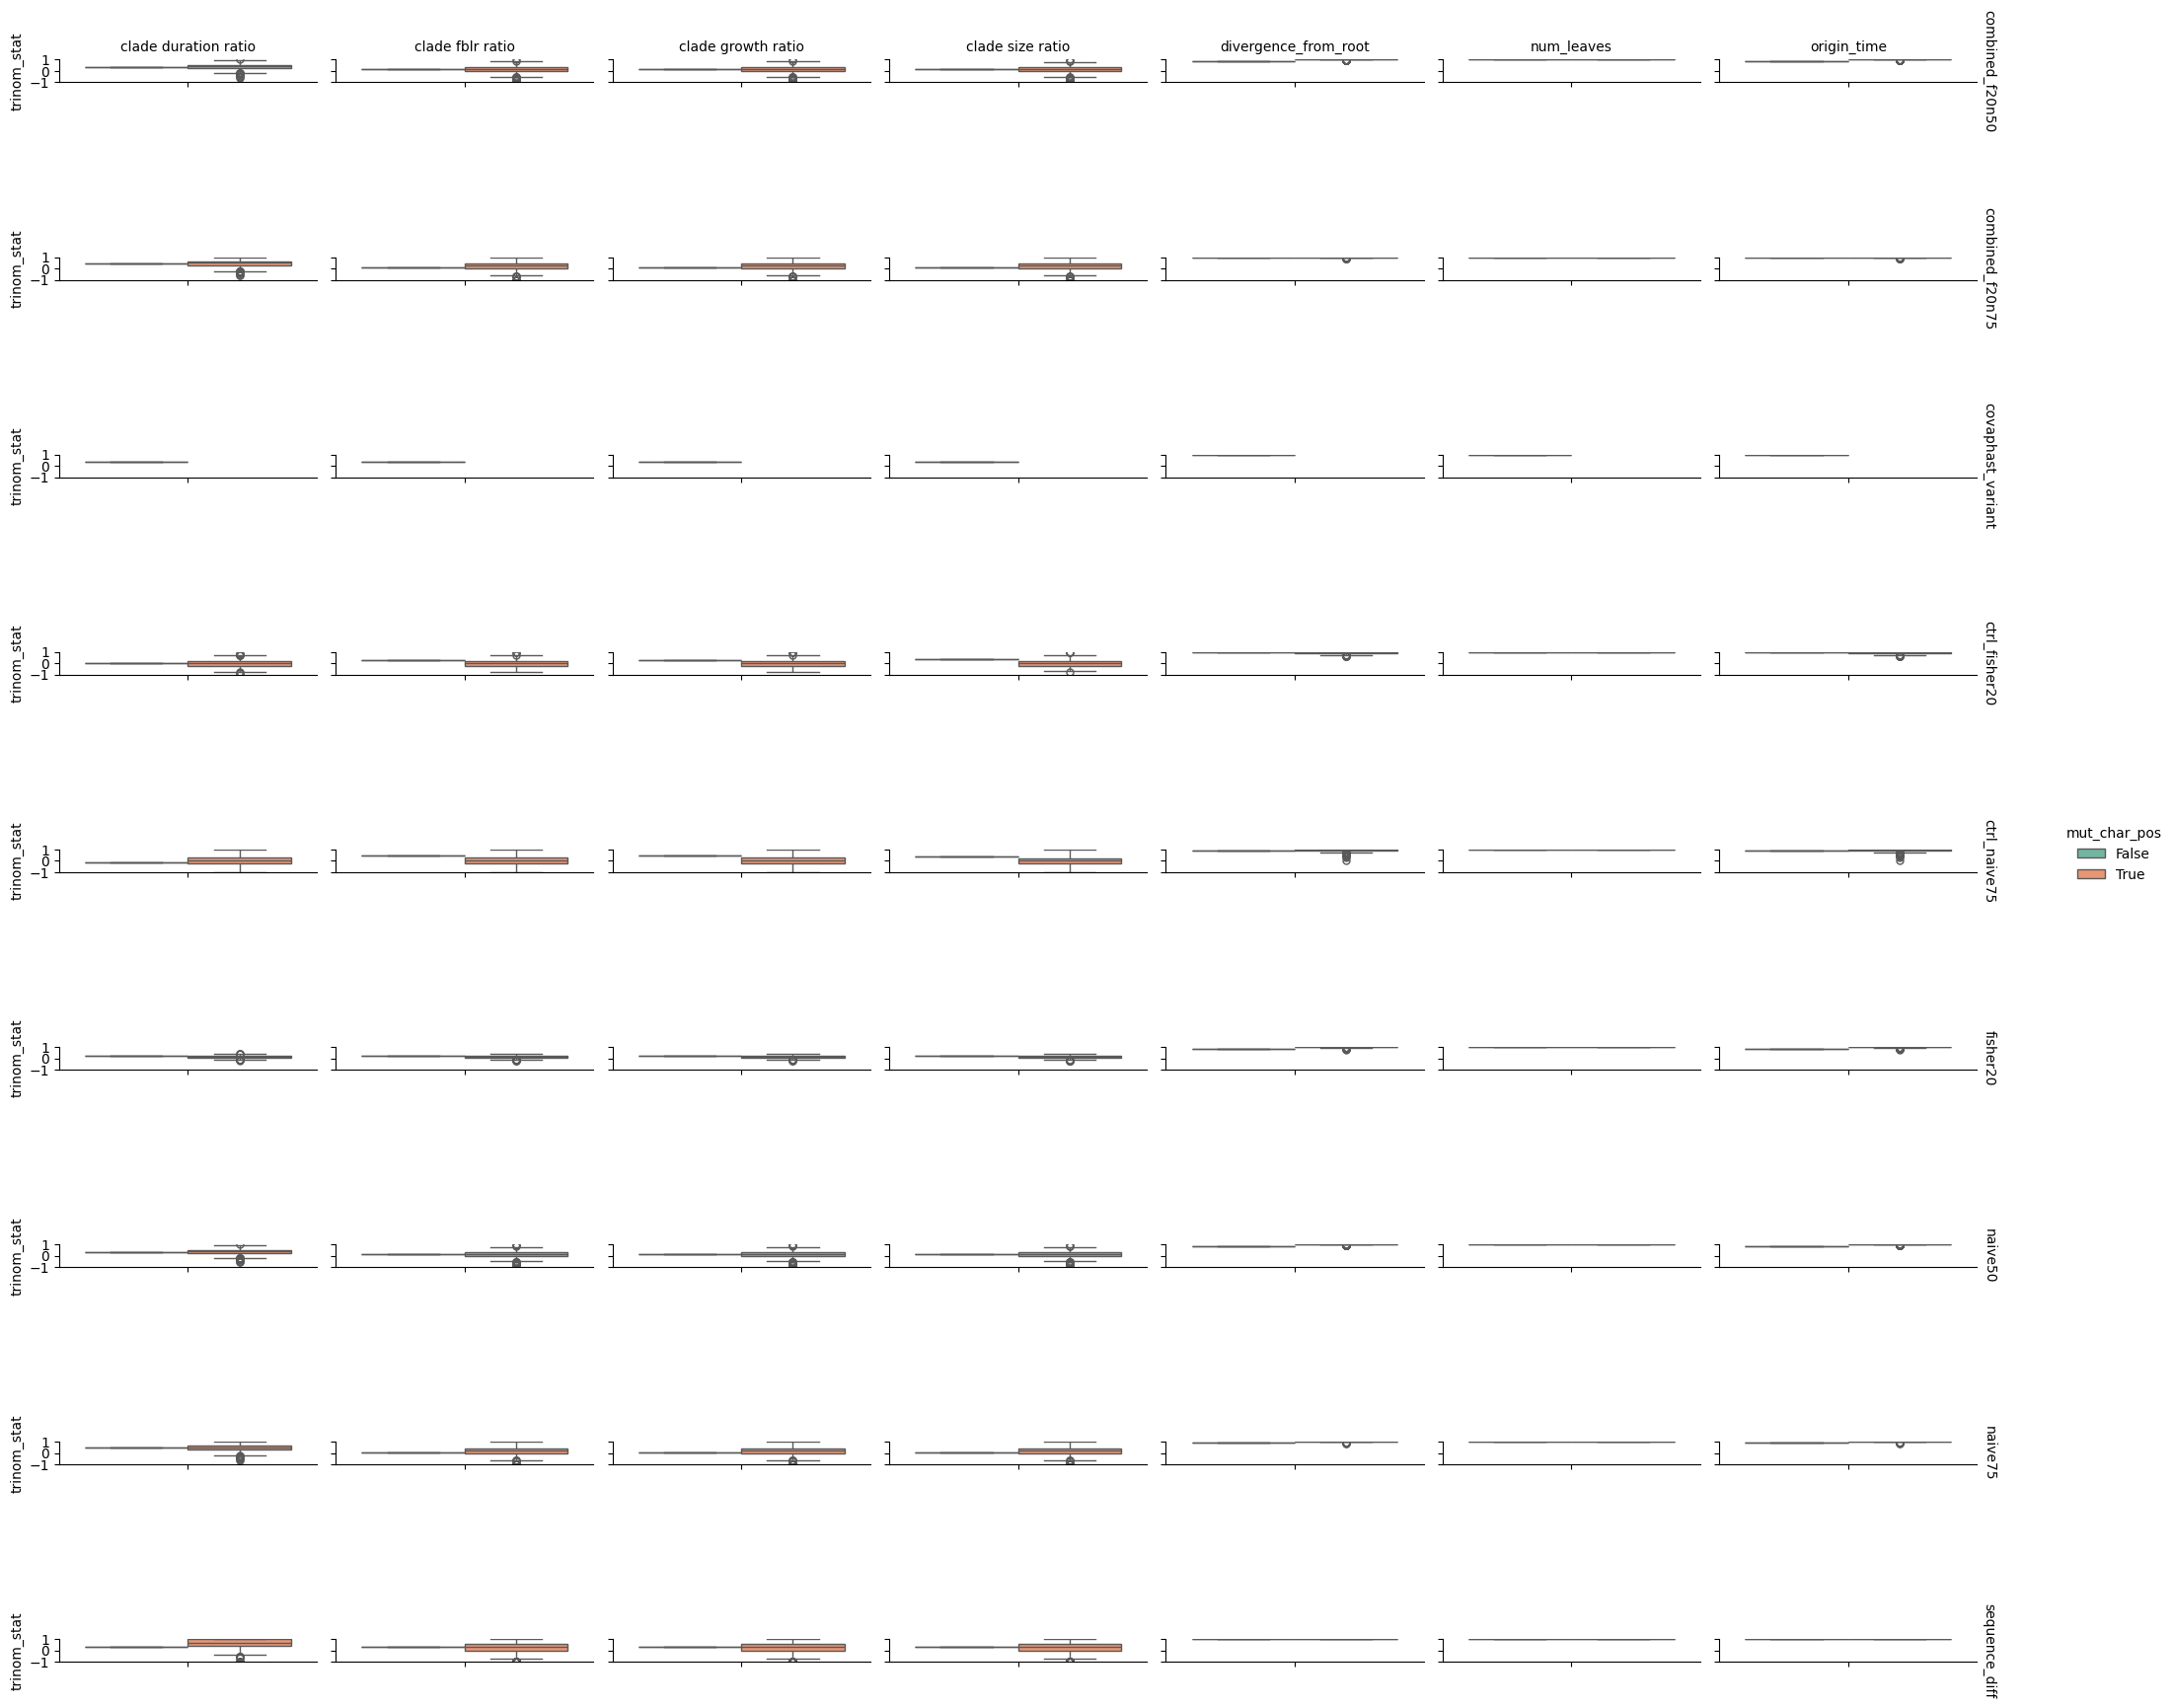

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


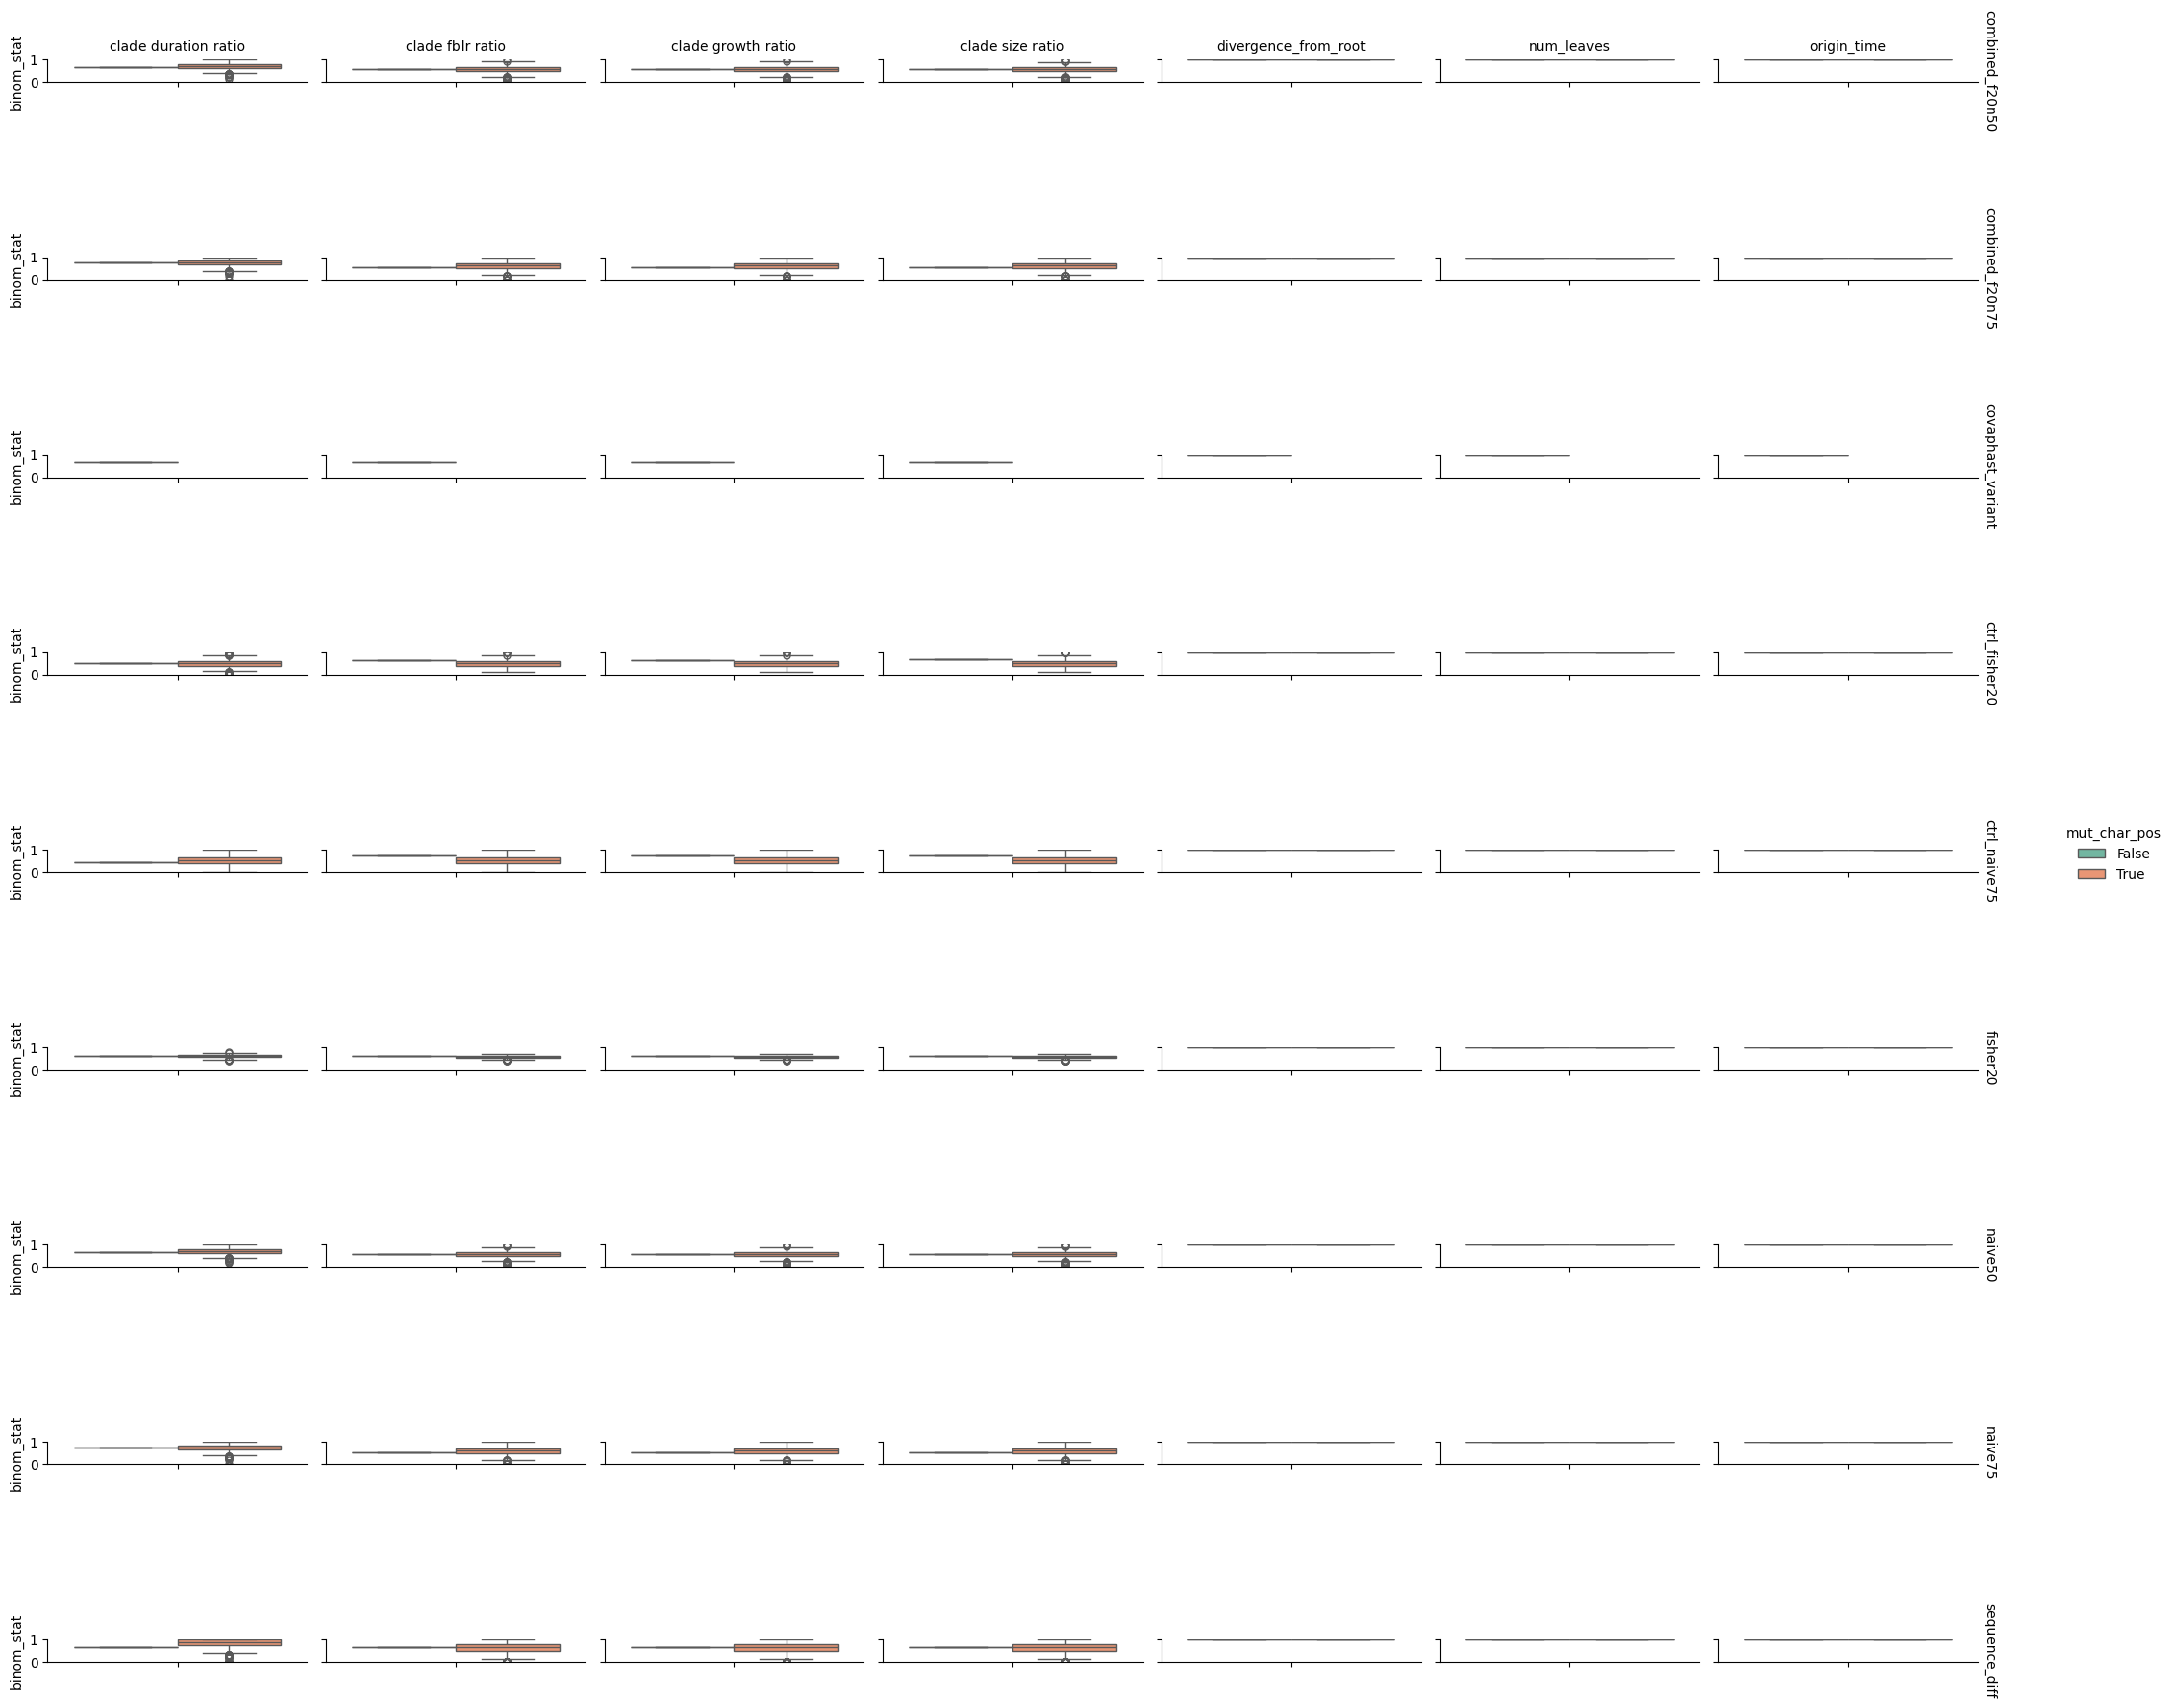

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


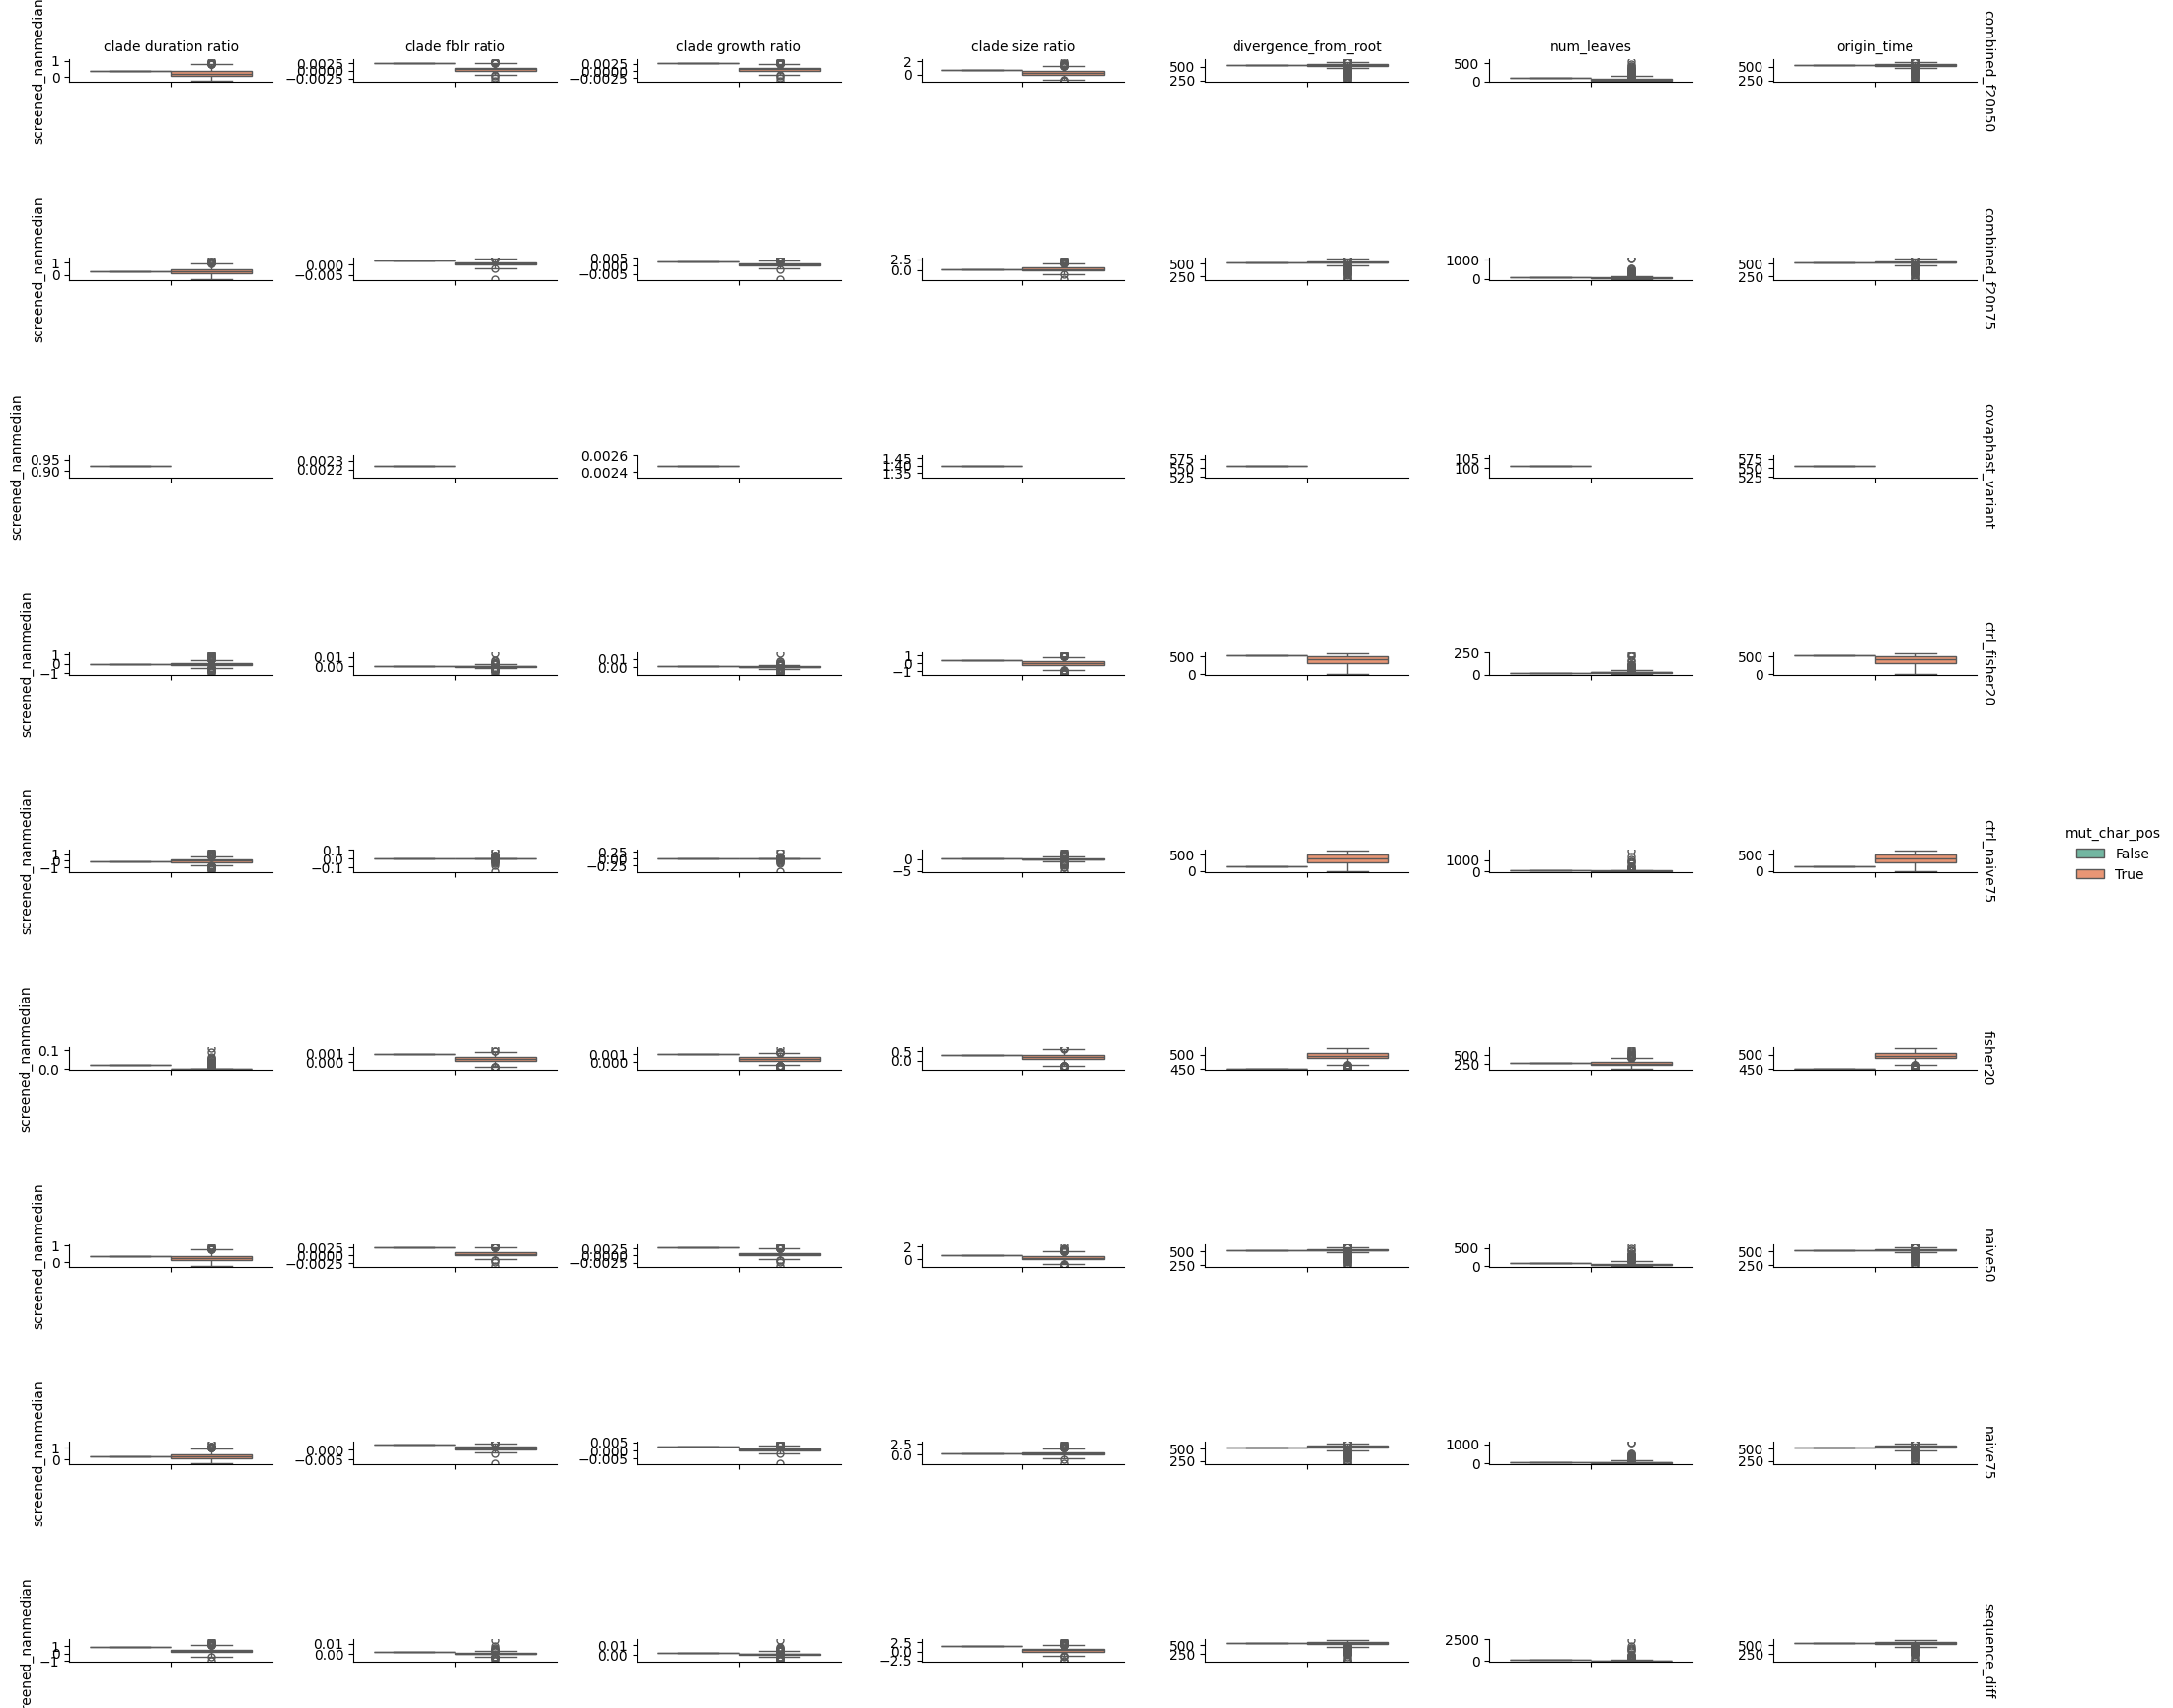

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


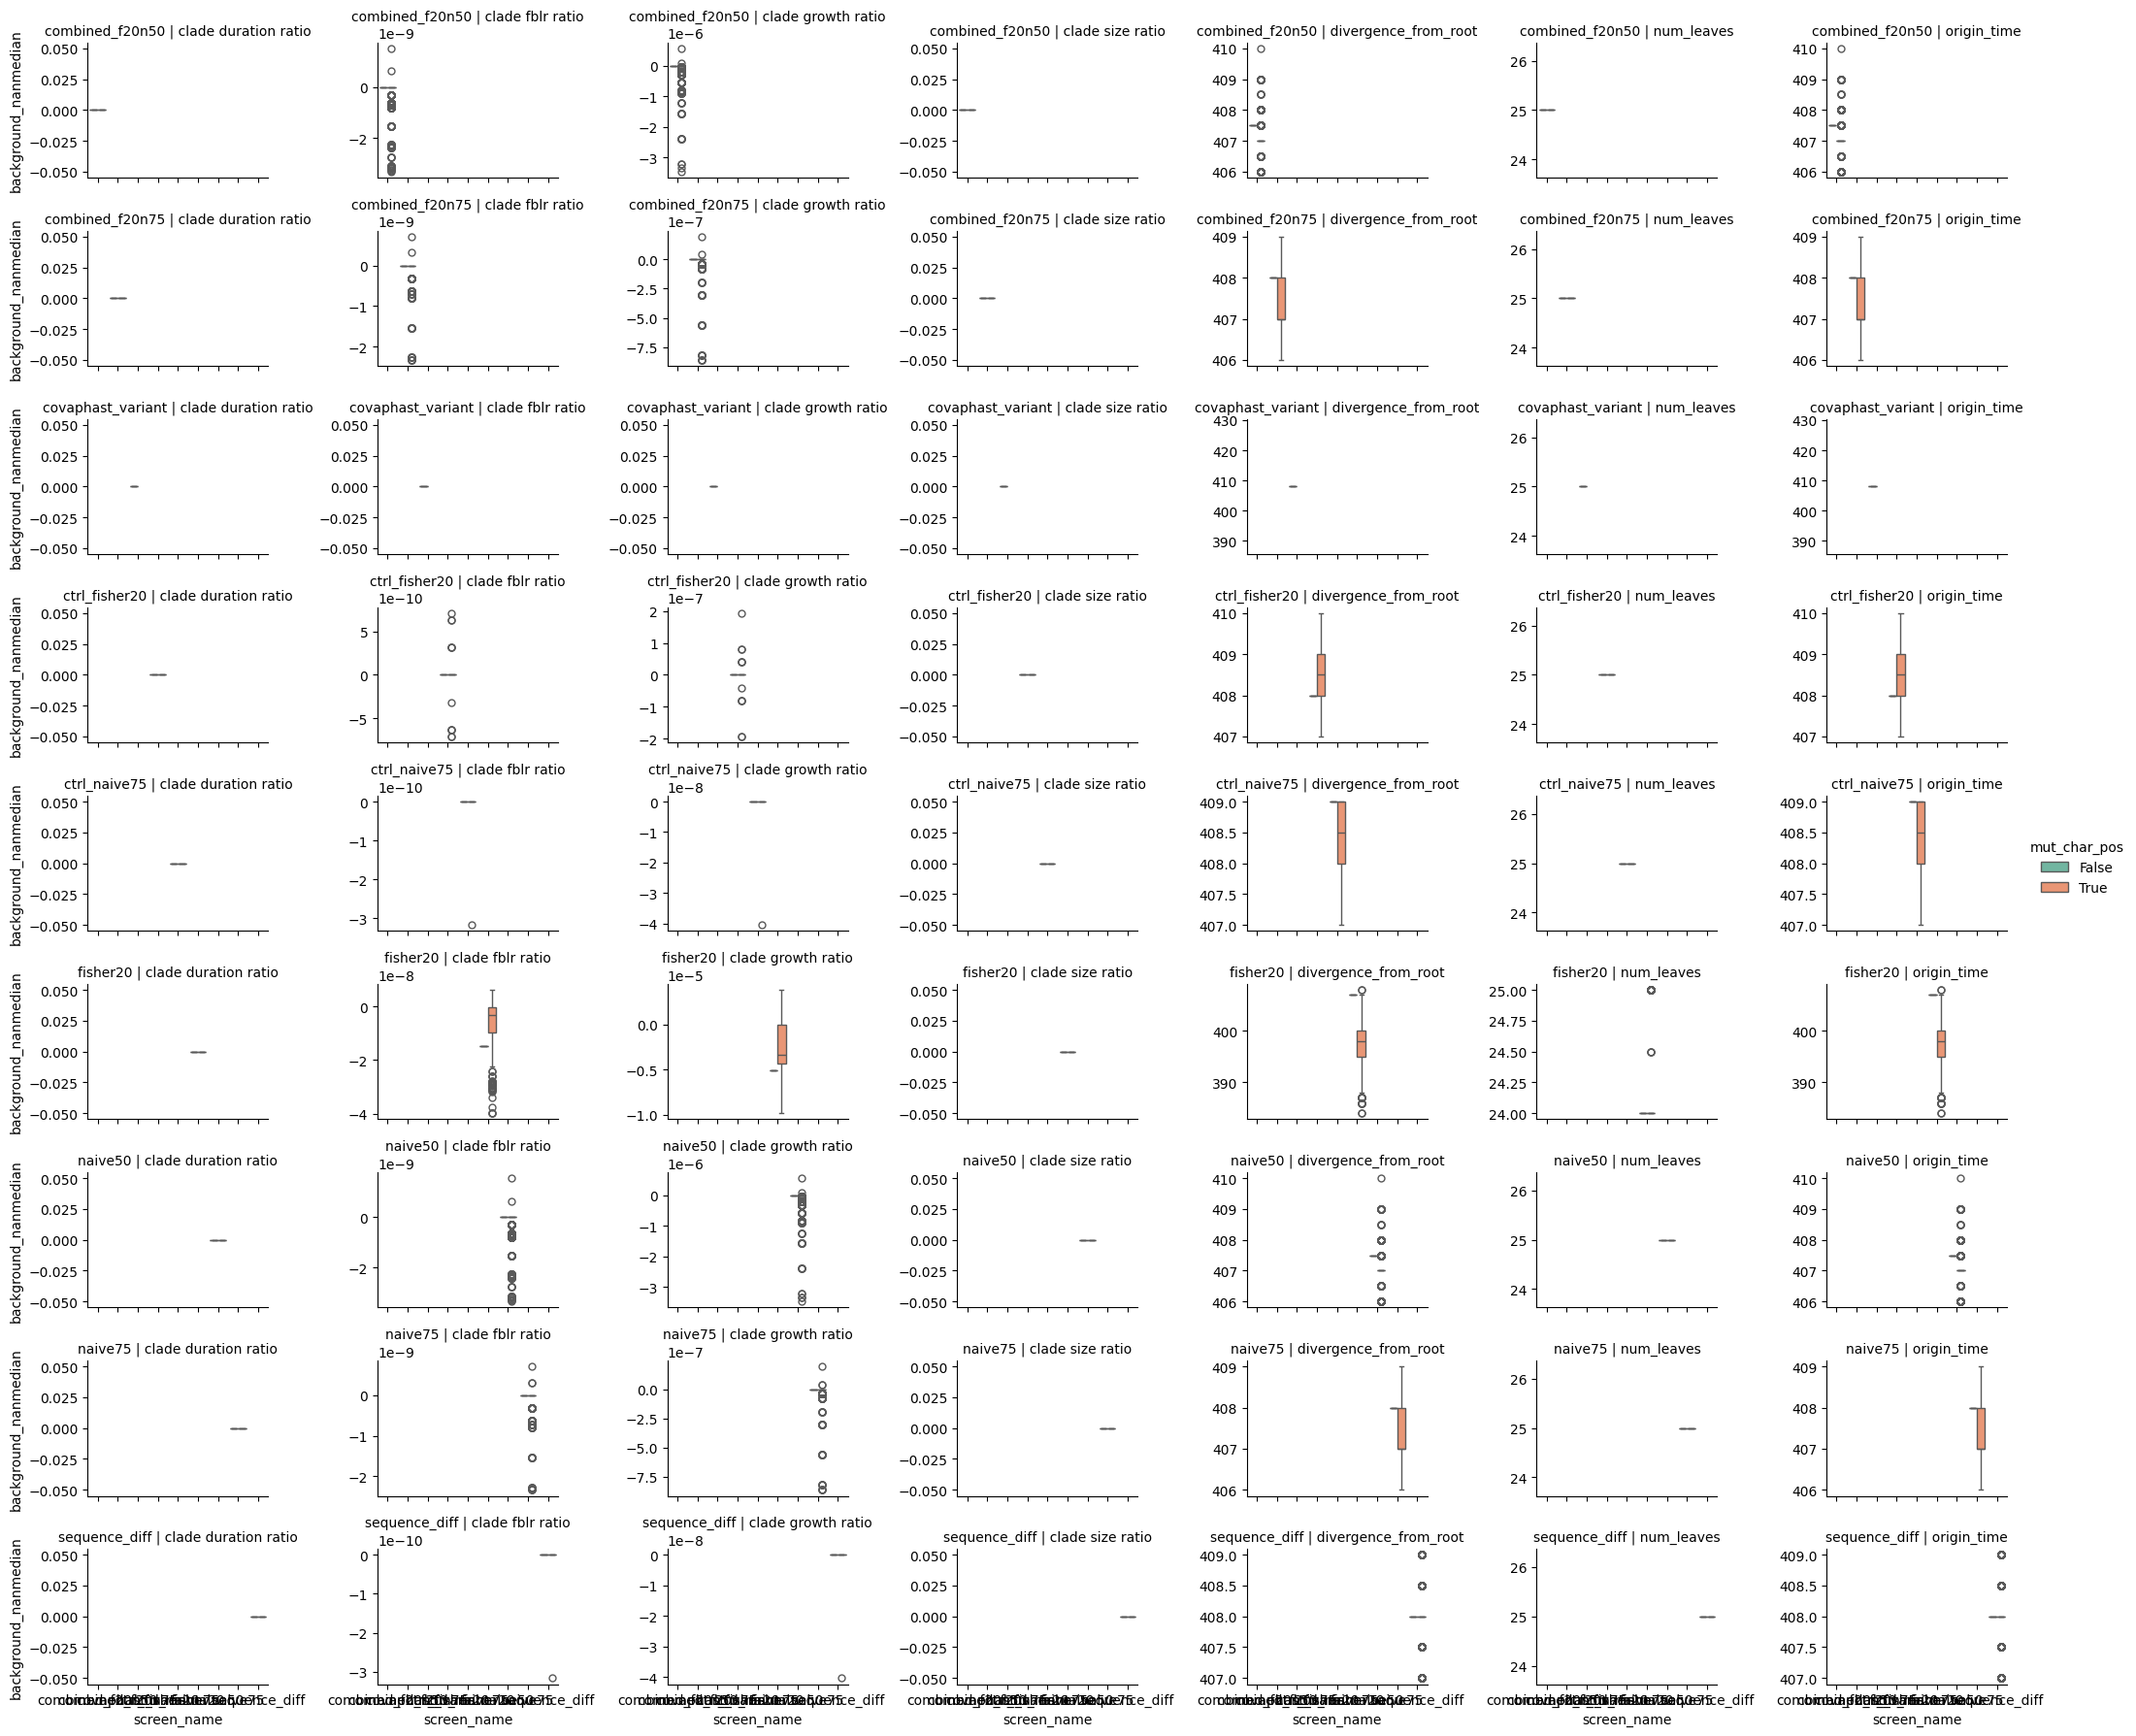

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
